In [1]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
from tensorflow import keras

In [37]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [25]:
image=tf.io.read_file('I:\JupyterFile\deeplearning\cnn\image.jpg')
image=tf.io.decode_image(image,channels=3)

In [30]:
image1=tf.expand_dims(image,axis=0)

In [40]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [10]:
#简单的cnn模型
model1 = keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
#ResNet-34
class ResidualUnit(keras.layers.Layer):
    def __init__(self,filters,strides=1,activation='relu',**kwargs):
        super().init(**kwargs)
        self.activation=kearas.activations.get(cativation)
        self.main_layers=[
            keras.layers.Conv2D(filters,3,strides=strides,padding='same',use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            kears.layers.Conv2D(filters,3,strides=1,padding='same',use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers=[]
        if strides > 1:
            self.skip_layers=[
                keras.layers.Conv2D(fliters,1,strides=strides,padding='same',use_bias=False),
                keras.layers.BatchNormalization()
            ]
    
    def call(self,inputs):
        Z=inputs
        for layer in self.main_layers:
            Z=layer(Z)
            pass
        skip_Z=inputs
        for layer in self.skip_layers:
            skip_Z=layer(skip_Z)
            pass
        return self.activation(Z+skip_Z)

In [ ]:
model2=keras.models.Sequential()
model2.add(keras.layers.Conv2D(64,7,strides=2,input_shape=[224,224,3],padding='same',use_bias=False))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
    strides=1 if filters == prev_filters else 2
    model2.add(ResidualUnit(filters,strides=strides))
    prev_filters=filters
    pass
model2.add(keras.layers.GlobalAveragePooling2D())
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(10,activation='softmax'))

In [43]:
model3=keras.applications.resnet50.ResNet50(weights='imagenet')#加载一个已经训练好的图形
images_resized=tf.image.resize(images,[224,224])#其需要图片尺寸是224×224。这个函数不会保留宽高比，可以用tf.image.crop_and_resize()来完成
inputs=keras.applications.resnet50.preprocess_input(images_resized*255)#预处理数据
Y_proba=model3.predict(inputs)#用模型进行预测


In [44]:
top_K=keras.applications.resnet50.decode_predictions(Y_proba,top=3)#前K个预测
for image_index in range(len(images)):
    print('image #{}'.format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print(' {} - {:12s} {:.2f}%'.format(class_id, name, y_proba*100))
        pass
    print()

image #0
 n02825657 - bell_cote    82.35%
 n03877845 - palace       6.75%
 n03781244 - monastery    4.19%

image #1
 n03530642 - honeycomb    49.83%
 n13040303 - stinkhorn    33.96%
 n02206856 - bee          4.35%



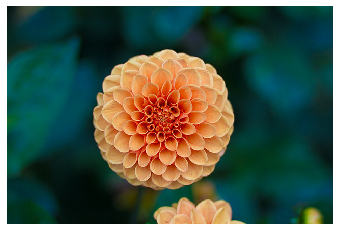

In [46]:
plot_image(images[1])

In [4]:
import os

In [6]:
# GPU
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')

# CPU
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus,cpus)

[] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
